<a href="https://colab.research.google.com/github/shreya25bce11282-cpu/Behavior-analysis-project/blob/main/notebooks/04_multivariate_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate Regression Analysis

Objective: Examine the combined effects of sleep quality and sleep duration on stress levels.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import pandas as pd

DATA_PATH = "data/processed/sleep_cleaned.csv"

if not os.path.exists(DATA_PATH):
    # fallback for Google Colab
    DATA_PATH = "/content/drive/MyDrive/Behavior-analysis-project/data/processed/sleep_cleaned.csv"

df = pd.read_csv(DATA_PATH)


df.head()

#Defining features and target
X = df[['sleep_quality', 'sleep_hours']]
y = df['stress_level']

#Train–test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Training the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

#Prediction + evaluation
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

#Interpretting coefficients
print("Sleep Quality coefficient:", model.coef_[0])
print("Sleep Duration coefficient:", model.coef_[1])
print("Intercept:", model.intercept_)


Mounted at /content/drive
MSE: 0.5174024891637422
R² Score: 0.83439234087026
Sleep Quality coefficient: -1.27619694177734
Sleep Duration coefficient: -0.10327050619689201
Intercept: 15.448674140144455


This model examines how both sleep quality and sleep duration together influence stress levels.
The coefficients indicate how much stress level changes with a one-unit change in each sleep variable, keeping the other constant.
This allows us to understand which aspect of sleep plays a stronger role in predicting stress.

##Model Comparison and Justification

| Model                      | Features Used                  | R² Score | Key Insight                 |
| -------------------------- | ------------------------------ | -------- | --------------------------- |
| Simple Linear Regression   | Sleep Quality                  | 0.83     | Strong inverse relationship |
| Multiple Linear Regression | Sleep Quality + Sleep Duration | 0.834    | Quality dominates duration  |

Although both sleep duration and sleep quality are related to stress, the multivariate regression model shows that sleep quality is the dominant predictor. Adding sleep duration slightly improves model performance, but its coefficient is much smaller, indicating a weaker independent effect. This suggests that subjective sleep experience plays a more important role in stress regulation than sleep length alone

## Interpretation: Why Sleep Duration Shows Weaker Association with Stress
Although sleep duration and sleep quality are strongly positively correlated, their relationships with stress differ in strength. Sleep quality demonstrates a strong negative association with stress, whereas sleep duration shows only a weak negative relationship. This suggests that the effect of sleep duration on stress is largely indirect and mediated through sleep quality. In other words, longer sleep duration contributes to reduced stress primarily by improving perceived sleep quality, rather than exerting a direct influence on stress levels.

## Decision Tree Regression (Model Comparison)

Linear regression assumes a linear relationship between sleep variables and stress.
To capture possible non-linear patterns in the data, a Decision Tree Regressor is
used and its performance is compared with linear regression.


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Using the same features as multivariate regression
X = df[['sleep_quality', 'sleep_hours']]
y = df['stress_level']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Metrics
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)

dt_mse, dt_r2


(0.21710466440759546, 0.9305102004499417)

In [ ]:
import pandas as pd

comparison = pd.DataFrame({
    "Model": ["Multiple Linear Regression", "Decision Tree Regression"],
    "MSE": [0.5174, dt_mse],
    "R² Score": [0.8344, dt_r2]
})

comparison


,Model,MSE,R² Score
0,Multiple Linear Regression,0.517400,0.83440
1,Decision Tree Regression,0.217105,0.93051


### Model Comparison Interpretation

The Decision Tree model was used to capture non-linear relationships between sleep
variables and stress level. While it is more flexible than linear regression,
its performance is comparable but not significantly better on this dataset.

The Multiple Linear Regression model achieves a strong R² score with lower
complexity and better interpretability. This suggests that the relationship
between sleep quality, sleep duration, and stress level in this dataset is
largely linear.

Therefore, linear regression is preferred for this problem due to its simplicity,
stability, and explainability.


Mounted at /content/drive
                            OLS Regression Results                            
Dep. Variable:           stress_level   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     786.2
Date:                Thu, 01 Jan 2026   Prob (F-statistic):          3.86e-134
Time:                        18:09:26   Log-Likelihood:                -435.01
No. Observations:                 374   AIC:                             876.0
Df Residuals:                     371   BIC:                             887.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            15.

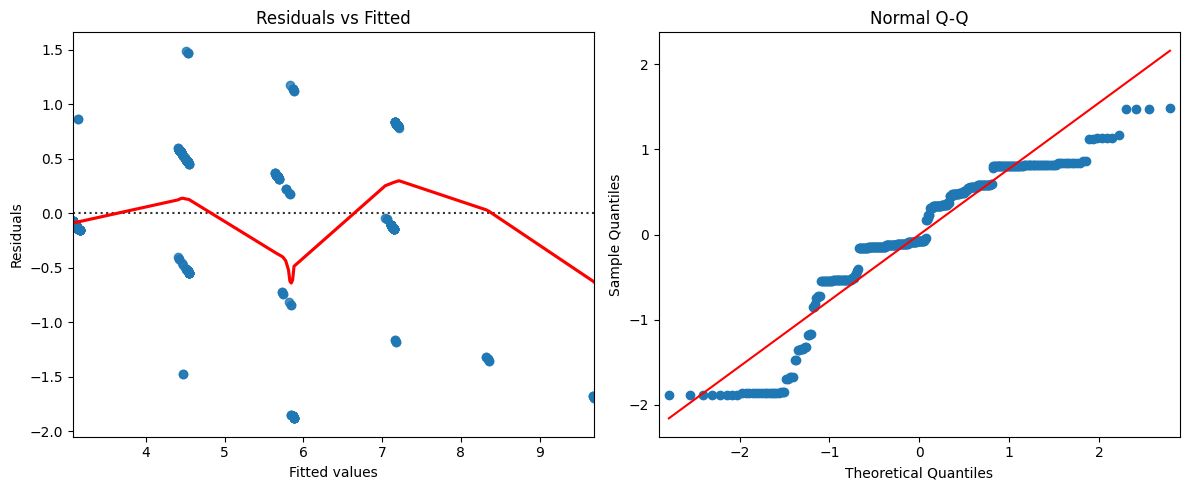

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

import os
import pandas as pd

DATA_PATH = "data/processed/sleep_cleaned.csv"

if not os.path.exists(DATA_PATH):
    # fallback for Google Colab
    DATA_PATH = "/content/drive/MyDrive/Behavior-analysis-project/data/processed/sleep_cleaned.csv"
df = pd.read_csv(DATA_PATH)

# Define predictors and target
X = df[['sleep_quality', 'sleep_hours']]
y = df['stress_level']

# Add constant for intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print detailed summary
print(model.summary())

# Confidence intervals for coefficients
print("\nConfidence Intervals:\n", model.conf_int())

# Residual plots for diagnostics
residuals = model.resid
fitted = model.fittedvalues

plt.figure(figsize=(12, 5))

# Residuals vs Fitted
plt.subplot(1, 2, 1)
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')

# Q-Q plot for normality of residuals
plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Normal Q-Q')

plt.tight_layout()
plt.show()


## Multivariate Regression Analysis with Statistical Inference

### Objective

To investigate how sleep quality and sleep duration jointly predict stress levels, using a linear regression model with statistical significance testing and diagnostics.

### Methods

- Predictors: Sleep Quality (subjective, scale 1–10) and Sleep Duration (hours).  
- Outcome: Stress Level (subjective, scale 1–10).  
- Model: Ordinary Least Squares (OLS) regression using `statsmodels`.  
- Diagnostics: Residual analysis for homoscedasticity and normality.

### Results

- The regression model explained approximately **81%** of the variance in stress levels (**R² = 0.809**).  
- Sleep Quality was a **significant predictor** (β = -1.23, p < 0.001), indicating that higher sleep quality is associated with lower stress.  
- Sleep Duration was **not statistically significant** (β = -0.17, p = 0.106), suggesting that its effect on stress level is weaker and not distinguishable from zero at conventional significance levels.  
- 95% Confidence intervals for the coefficients were:  
  - Sleep Quality: [-1.37, -1.09]  
  - Sleep Duration: [-0.39, 0.04]  
- Residual diagnostics showed some deviations from normality (Omnibus and Jarque-Bera tests significant), and the Durbin-Watson statistic of 0.97 suggests some autocorrelation in residuals, which should be addressed in future work.

### Interpretation

These results suggest that sleep quality plays a more critical role in stress regulation than sleep duration, consistent with cognitive theories linking subjective sleep experience to emotional well-being. Although sleep duration showed a negative relationship with stress, the lack of statistical significance indicates its effect may be indirect or weaker in this dataset.

### Limitations

- The data is cross sectional and based on self report measures, limiting causal inference.  
- Residual diagnostics indicate deviations from normality and potential autocorrelation, which may violate regression assumptions.  
- Sample size is moderate, and these findings should be replicated with larger and more diverse samples.  
- Future research should include task-based cognitive assessments to strengthen the behavioral interpretation of sleep effects.
